**CPE 695 -  Final Project**

**Title** - Analyzing and Predicting US Stocks alongside Coronavirus to understand its impact on various industries

**Group Members:**
Chirag Sharma
Prem Patel
Shreya Bhargava

**Guided by -**
Dr. Shucheng Yu

In [1]:
# Import the libraries
import os
import datetime
import pandas as pd
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import numpy as np

# Files will be saved in the following location
cd = os.getcwd()
print(cd)
datetoday = datetime.datetime.today().strftime('%Y-%m-%d')
print(datetoday)

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


/content
2020-05-14


In [0]:
# URL links for confirmed, recovered, and death cases (The source is updated everyday)
csv_url_confirmed_cases = 'https://data.humdata.org/hxlproxy/data/download/time_series_covid19_confirmed_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv'
csv_url_recovered_cases = 'https://data.humdata.org/hxlproxy/data/download/time_series_covid19_recovered_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv'
csv_url_deaths = 'https://data.humdata.org/hxlproxy/data/download/time_series_covid19_deaths_global_narrow.csv?dest=data_edit&filter01=merge&merge-url01=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D1326629740%26single%3Dtrue%26output%3Dcsv&merge-keys01=%23country%2Bname&merge-tags01=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&filter02=merge&merge-url02=https%3A%2F%2Fdocs.google.com%2Fspreadsheets%2Fd%2Fe%2F2PACX-1vTglKQRXpkKSErDiWG6ycqEth32MY0reMuVGhaslImLjfuLU0EUgyyu2e-3vKDArjqGX7dXEBV8FJ4f%2Fpub%3Fgid%3D398158223%26single%3Dtrue%26output%3Dcsv&merge-keys02=%23adm1%2Bname&merge-tags02=%23country%2Bcode%2C%23region%2Bmain%2Bcode%2C%23region%2Bsub%2Bcode%2C%23region%2Bintermediate%2Bcode&merge-replace02=on&merge-overwrite02=on&filter03=explode&explode-header-att03=date&explode-value-att03=value&filter04=rename&rename-oldtag04=%23affected%2Bdate&rename-newtag04=%23date&rename-header04=Date&filter05=rename&rename-oldtag05=%23affected%2Bvalue&rename-newtag05=%23affected%2Binfected%2Bvalue%2Bnum&rename-header05=Value&filter06=clean&clean-date-tags06=%23date&filter07=sort&sort-tags07=%23date&sort-reverse07=on&filter08=sort&sort-tags08=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv'
constituents_URL = 'https://docs.google.com/spreadsheets/d/1Q0q7kAfP6f0dSx6voFXDR2VrTmaP-yUEXQb0Lkjvj4c/export?format=csv'

# The following four lines of code will take time to execute. This block of code will take about a minute to run
confirmed_cases = pd.read_csv(csv_url_confirmed_cases)
recovered_cases = pd.read_csv(csv_url_recovered_cases)
deaths = pd.read_csv(csv_url_deaths)
constituents_csv = pd.read_csv(constituents_URL)

# Creating a duplicate of dfs
og_confirmed_cases = confirmed_cases
og_recovered_cases = recovered_cases
og_deaths = deaths

In [0]:
# Saving the content of above URLs to csv files from cloud directory
confirmed_cases.to_csv("/content/confirmed_cases_" + datetoday + ".csv", index=False, line_terminator='\n')
recovered_cases.to_csv("/content/recovered_cases" + datetoday + ".csv", index=False, line_terminator='\n')
deaths.to_csv("/content/deaths_" + datetoday + ".csv", index=False, line_terminator='\n')
constituents_csv.to_csv("/content/constituents_" + datetoday + ".csv", index=False, line_terminator='\n')

In [0]:
# OPTIONAL: Downloading a copy on your local machine. Please allow multiple downloads if prompted
from google.colab import files
files.download("confirmed_cases_" + datetoday + ".csv")
files.download("recovered_cases_" + datetoday + ".csv")
files.download("deaths_" + datetoday + ".csv")
files.download("constituents_" + datetoday + ".csv")

In [0]:
# Data cleaning (COVID) - filtering country to US and keeping only 'Date' and 'Value' columns
confirmed_cases = confirmed_cases[confirmed_cases['Country/Region'] == 'US']
recovered_cases = recovered_cases[recovered_cases['Country/Region'] == 'US']
deaths = deaths[deaths['Country/Region'] == 'US']

confirmed_cases = confirmed_cases.filter(['Date', 'Value'])
recovered_cases = recovered_cases.filter(['Date', 'Value'])
deaths = deaths.filter(['Date', 'Value'])

# Renaming columns (COVID)
confirmed_cases = confirmed_cases.rename({"Value":"Confirmed_cases"}, axis='columns')
recovered_cases = recovered_cases.rename({"Value":"Recovered_cases"}, axis='columns')
deaths = deaths.rename({"Value":"Deaths"}, axis='columns')

# Data Merging (COVID)
covid_data = pd.merge(confirmed_cases, recovered_cases, on=['Date'], how='outer')
covid_data_final = pd.merge(covid_data, deaths, on=['Date'], how='outer')

# Creating backup dataframes
covid_date_final_bkp = covid_data_final

In [0]:
# To add additional week number column in COVID-19 datafram

import datetime
covid_data_final["Week"] = ""

# Convert Date column into int from str
for i in range(covid_data_final.shape[0]):
    temp_date = covid_data_final['Date'].iloc[i]
    temp_date_array = temp_date.split("-")
    temp_week = datetime.date(int(temp_date_array[0]), int(temp_date_array[1]), int(temp_date_array[2])).isocalendar()[1]

    covid_data_final['Week'].iloc[i] = temp_week

In [0]:
# Calculate new cases from the last week

covid_data_final["new_cases_last_week"] = ""
j = 0

for j in range(covid_data_final.shape[0]):
  
    current_date_row_no = j
    if current_date_row_no + 7 <= covid_data_final.shape[0]:
        previous_week_row_no = current_date_row_no + 7    
  
    if previous_week_row_no == covid_data_final.shape[0]:
        for k in range(j, covid_data_final.shape[0]):
            covid_data_final['new_cases_last_week'].iloc[k] = 0
          
    else:
        covid_data_final['new_cases_last_week'].iloc[j] = int(covid_data_final['Confirmed_cases'].iloc[current_date_row_no]) - int(covid_data_final['Confirmed_cases'].iloc[previous_week_row_no])

# Saving the final COVID file
covid_data_final.to_csv("/content/constituents_" + datetoday + ".csv", index=False, line_terminator='\n')

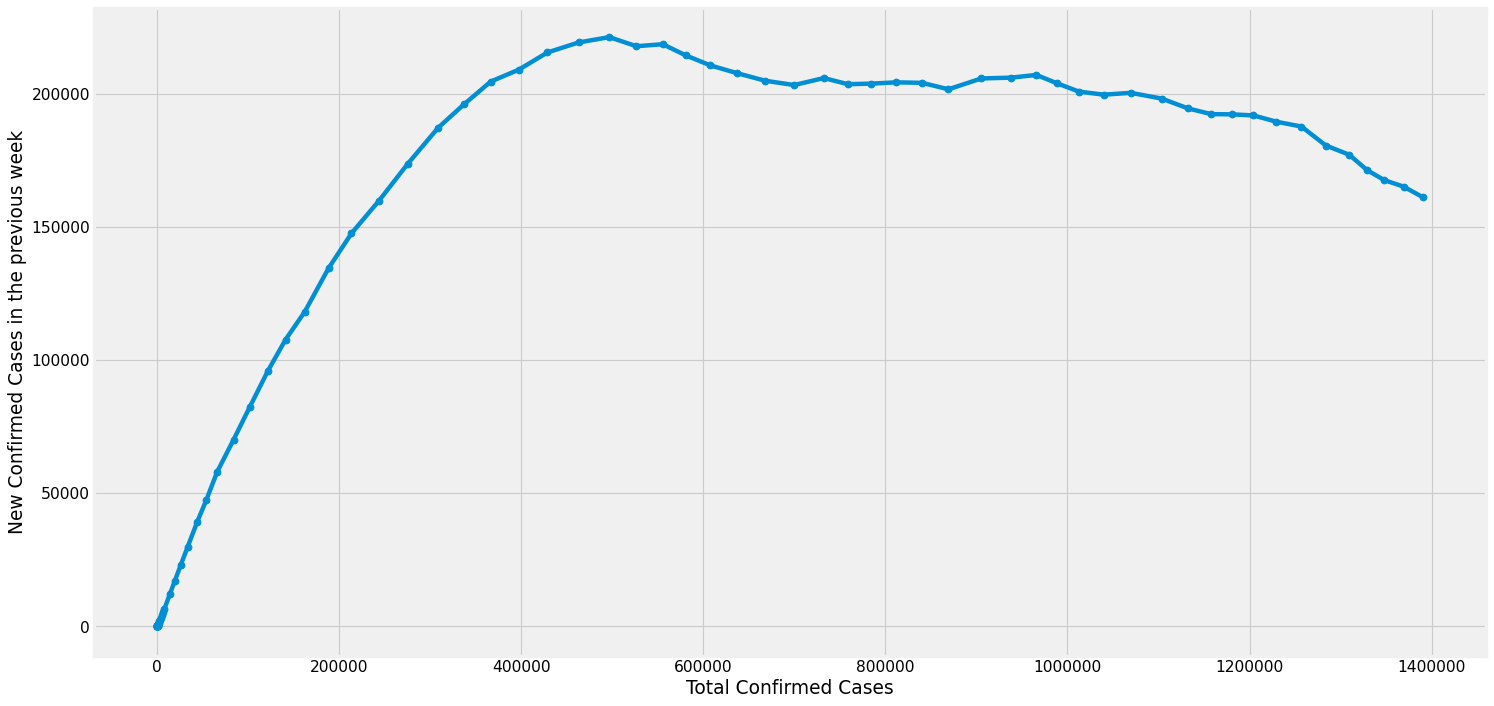

In [7]:
# Plotting confirmed_cases vs new_cases_last_week
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.style.use('fivethirtyeight')

# Creating datafram for plot
plot_data = covid_data_final.filter(["Date", "Confirmed_cases", "new_cases_last_week"]).sort_values(by=['Date'])
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plot_data[['Confirmed_cases']] = plot_data[['Confirmed_cases']].apply(pd.to_numeric)
plt.ticklabel_format(style='plain', axis='x')

# Plot
plt.plot(plot_data['Confirmed_cases'], plot_data['new_cases_last_week'], "-o")

plt.xlabel('Total Confirmed Cases')
#plt.xticks(rotation=90)
plt.ylabel('New Confirmed Cases in the previous week')
plt.grid(True)
plt.show()

In [8]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=cdf0bbcaaff3041fb0336436ce67880f6c1cfdfca9e2efbb3a2be7152db316dc
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [9]:
#Stock market data from 2018 to present
import yfinance as yf

# install yfinance if not already installed
# pip install yfinance 

#Loading compnay index data
company_data = constituents_csv
c_symbol = company_data['Symbol'].values.tolist()

#Merging all stock market data into one data frame
data = []
final_data = []
final_data = pd.DataFrame(final_data, columns = ['Date', 'Company', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

for i in range(len(c_symbol)):
    
    #Download stock data
    data = yf.download(c_symbol[i],'2018-01-01',datetoday)
    data = data.reset_index()
    
    if i == 0:
        final_data = data
    else:
        final_data = pd.merge(final_data, data, on=['Date'], how='outer')

    temp_data = final_data
    
    #Renaming the columns
    final_data = final_data.rename({"Company":"Company_" + c_symbol[i], "Open":"Open_" + c_symbol[i],"High":"High_" + c_symbol[i],"Low":"Low_" + c_symbol[i],"Close":"Close_" + c_symbol[i],"Adj Close":"Adj Close_" + c_symbol[i],"Volume":"Volume_" + c_symbol[i]}, axis='columns')

print('Finished pulling all stock market data')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Date,Open_MMM,High_MMM,Low_MMM,Close_MMM,Adj Close_MMM,Volume_MMM,Open_AOS,High_AOS,Low_AOS,Close_AOS,Adj Close_AOS,Volume_AOS,Open_ABT,High_ABT,Low_ABT,Close_ABT,Adj Close_ABT,Volume_ABT,Open_ABBV,High_ABBV,Low_ABBV,Close_ABBV,Adj Close_ABBV,Volume_ABBV,Open_ACN,High_ACN,Low_ACN,Close_ACN,Adj Close_ACN,Volume_ACN,Open_ATVI,High_ATVI,Low_ATVI,Close_ATVI,Adj Close_ATVI,Volume_ATVI,Open_AYI,High_AYI,Low_AYI,...,Low_XLNX,Close_XLNX,Adj Close_XLNX,Volume_XLNX,Open_XL,High_XL,Low_XL,Close_XL,Adj Close_XL,Volume_XL,Open_XYL,High_XYL,Low_XYL,Close_XYL,Adj Close_XYL,Volume_XYL,Open_YUM,High_YUM,Low_YUM,Close_YUM,Adj Close_YUM,Volume_YUM,Open_ZBH,High_ZBH,Low_ZBH,Close_ZBH,Adj Close_ZBH,Volume_ZBH,Open_ZION,High_ZION,Low_ZION,Close_ZION,Adj Close_ZION,Volume_ZION,Open_ZTS,High_ZTS,Low_ZTS,Close_ZTS,Adj Close_ZTS,Volume_ZTS
0,2018-01-02,235.779999,237.070007,232.809998,235.639999,220.075348,2931000.0,61.450001,61.610001,61.040001,61.529999,58.923061,679200.0,58.200001,59.200001,57.820000,58.790001,56.312748,10112800.0,97.139999,98.900002,96.750000,98.410004,85.888794,4561300.0,153.500000,154.100006,152.779999,153.839996,147.988235,3061900.0,63.540001,64.669998,63.369999,64.309998,63.055592,5138800.0,176.669998,181.570007,176.669998,...,67.430000,67.879997,65.365051,2579900.0,35.209999,35.209999,33.860001,34.020000,33.623966,2129202.0,68.209999,68.209999,67.500000,68.070000,66.224709,877800.0,82.150002,82.459999,81.480003,81.599998,78.525864,1747800.0,121.000000,124.269997,120.559998,124.059998,121.795738,1765300.0,52.169998,52.169998,50.160000,50.700001,47.459354,2387100.0,72.540001,72.589996,71.470001,71.769997,70.676254,2135600.0
1,2018-01-03,235.070007,235.729996,233.289993,235.630005,220.065979,2193700.0,61.599998,61.990002,61.290001,61.900002,59.277386,766100.0,58.990002,59.020000,58.310001,58.919998,56.437267,5683700.0,98.550003,100.099998,98.040001,99.949997,87.232849,4702300.0,152.990005,154.990005,152.990005,154.550003,148.671219,2064200.0,64.550003,65.750000,64.400002,65.309998,64.036087,4383900.0,179.639999,179.639999,176.130005,...,67.779999,69.239998,66.674660,2453300.0,33.939999,34.520000,33.770000,34.430000,34.029190,1975743.0,67.989998,68.910004,67.970001,68.900002,67.032204,778800.0,81.230003,81.820000,81.129997,81.529999,78.458504,2554900.0,124.709999,125.400002,123.949997,124.919998,122.640053,1328800.0,50.689999,50.849998,50.279999,50.639999,47.403194,1575700.0,71.769997,72.180000,71.339996,72.099998,71.001228,2328200.0
2,2018-01-04,237.000000,239.440002,236.470001,238.710007,222.942566,2243100.0,62.000000,62.400002,61.820000,62.189999,59.555092,934500.0,59.500000,59.599998,58.759998,58.820000,56.341484,6240000.0,100.070000,100.120003,98.349998,99.379997,86.735374,3579000.0,155.000000,156.860001,154.770004,156.380005,150.431595,1777000.0,65.750000,65.870003,64.360001,64.660004,63.398773,3919800.0,177.860001,181.050003,175.919998,...,69.430000,70.489998,67.878334,3346500.0,34.500000,35.349998,34.419998,35.240002,34.829765,3509383.0,69.029999,69.639999,69.029999,69.360001,67.479729,796500.0,81.750000,82.589996,81.529999,82.360001,79.257233,1971200.0,125.290001,126.709999,123.410004,124.739998,122.463341,1073200.0,51.020000,51.630001,50.549999,50.849998,47.599766,3309200.0,72.750000,72.910004,72.260002,72.529999,71.424683,2534000.0
3,2018-01-05,238.649994,240.899994,237.740005,240.570007,224.679718,1835900.0,62.410000,63.000000,62.369999,62.990002,60.321205,619400.0,59.040001,59.090000,58.639999,58.990002,56.504322,5836900.0,99.339996,101.199997,98.559998,101.110001,88.245255,4599300.0,156.610001,157.720001,156.130005,157.669998,151.672546,1597600.0,64.879997,66.470001,64.489998,66.370003,65.075409,4999100.0,181.000000,185.820007,180.100006,...,72.000000,74.150002,71.402748,5683500.0,35.369999,35.375000,34.490002,34.650002,34.246632,2034514.0,69.500000,69.540001,69.040001,69.230003,67.353256,666800.0,82.589996,83.010002,82.360001,82.839996,79.719147,1927100.0,124.889999,126.209999,124.309998,125.980003,123.680717,10634

In [11]:
# Screening companies based on their avg adj close; selecting one high and one low company from each sector 
import pandas as pd

# Creating a new df with company name and their average adj close 

avg_close = []
avg_close = pd.DataFrame(avg_close, columns=['sector', 'company', 'symbol', 'avg_adj_close'])

avg_close['company'] = company_data['Name']
avg_close['sector'] = company_data['Sector']
avg_close['symbol'] = company_data['Symbol']

for i in range(avg_close.shape[0]):

  temp_name1 = avg_close['symbol'].iloc[i]

  for j in range(1, final_data.shape[1]):

    temp_name2 = "Adj Close_" + temp_name1
    avg_close['avg_adj_close'].iloc[i] = final_data[temp_name2].mean()
    break


avg_close = avg_close.sort_values(["sector", "avg_adj_close"], ascending = (True, False))

# Replace blank values with NaN
avg_close['avg_adj_close'].replace('', np.nan, inplace=True)

# Drop NaN
avg_close.dropna(subset=['avg_adj_close'], inplace=True)
avg_close.to_csv("/content/avg_close.csv", index=False, line_terminator='\n')
# print(avg_close)

# Creating the final list of companies

avg_close_og = avg_close

sectors_first = avg_close_og.drop_duplicates(subset='sector', keep='first')
sectors_last = avg_close_og.drop_duplicates(subset='sector', keep='last')

frames = [sectors_first, sectors_last]
final_company_list = pd.concat(frames)
final_company_list = final_company_list.sort_values(["sector", "avg_adj_close"], ascending = (True, False))

final_company_symbol = final_company_list['symbol']
print(final_company_symbol)

76      BKNG
200        F
130     COST
131     COTY
367      PXD
386      RRC
73       BLK
325     NAVI
307      MTD
322      MYL
450      TDG
55      ARNC
27     GOOGL
230      HPE
410      SHW
372       PX
174     EQIX
270      KIM
474       VZ
100      CTL
405      SCG
10       AES
Name: symbol, dtype: object


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


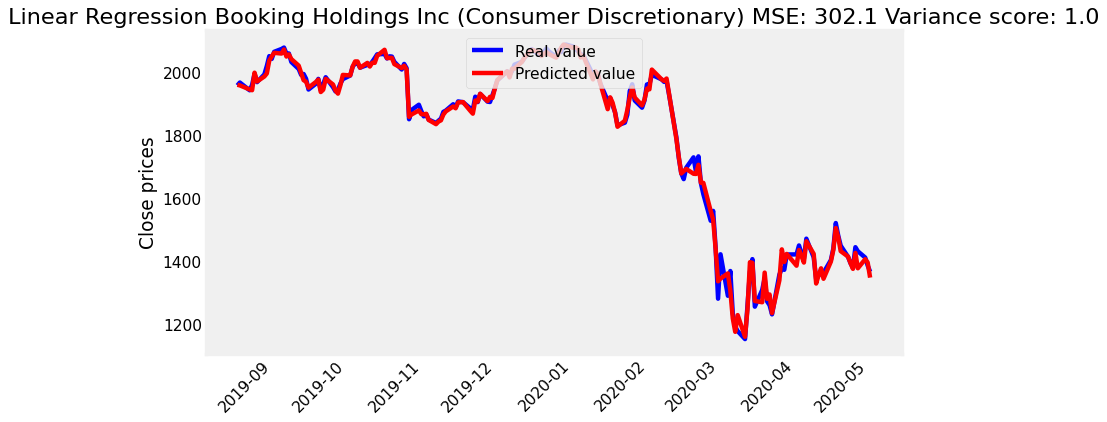

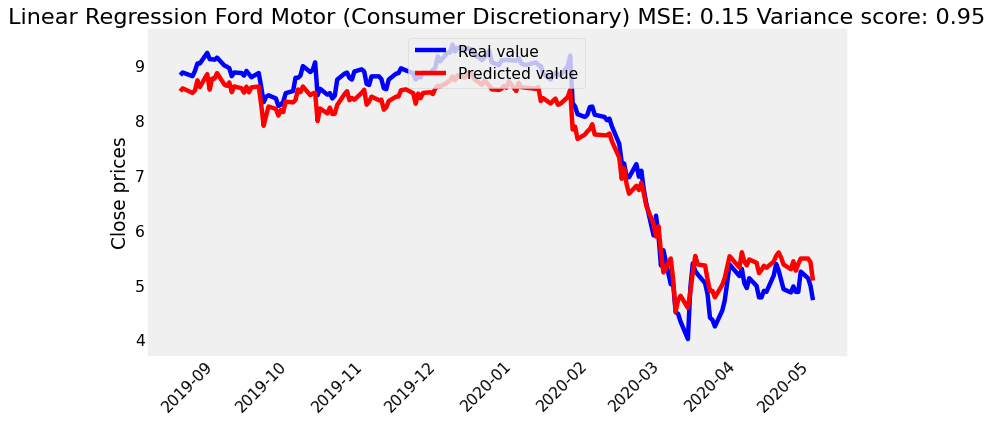

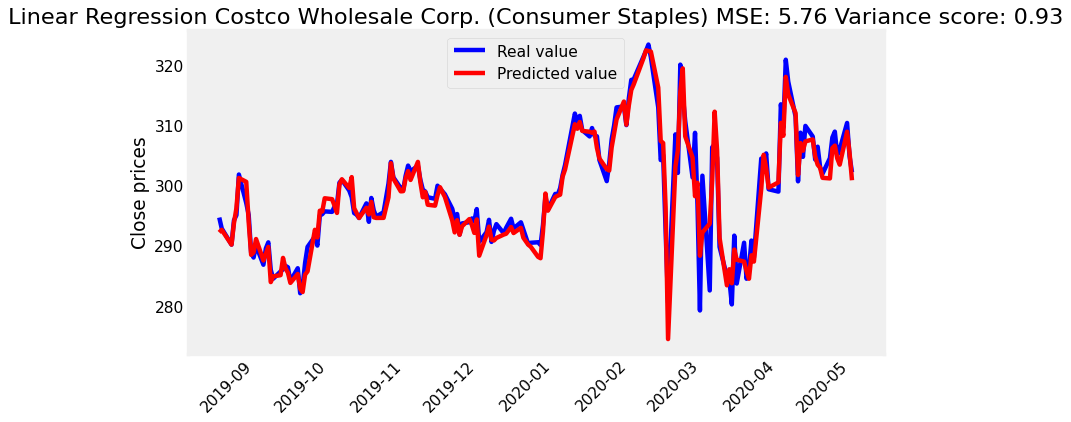

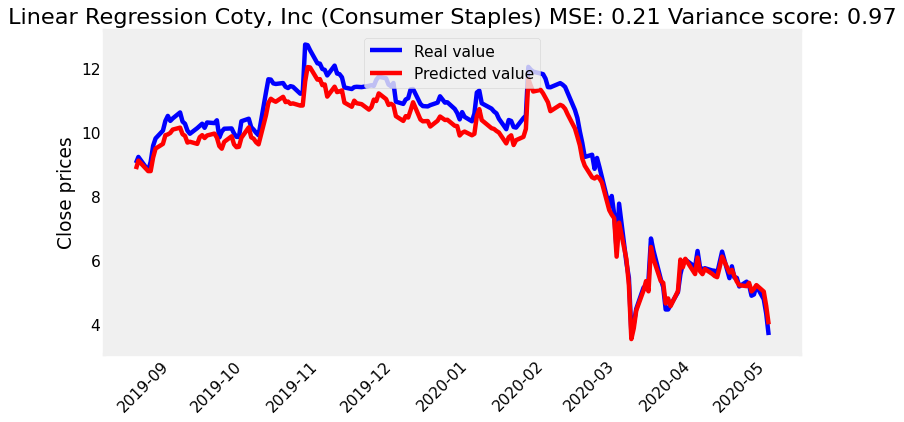

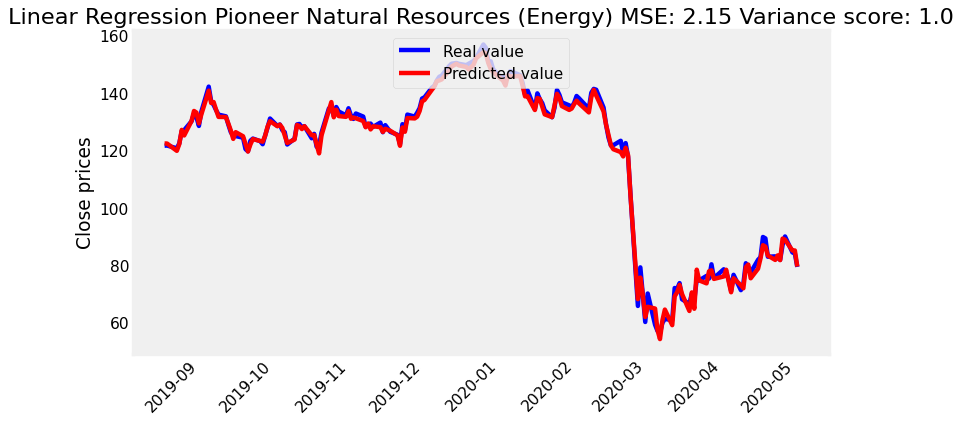

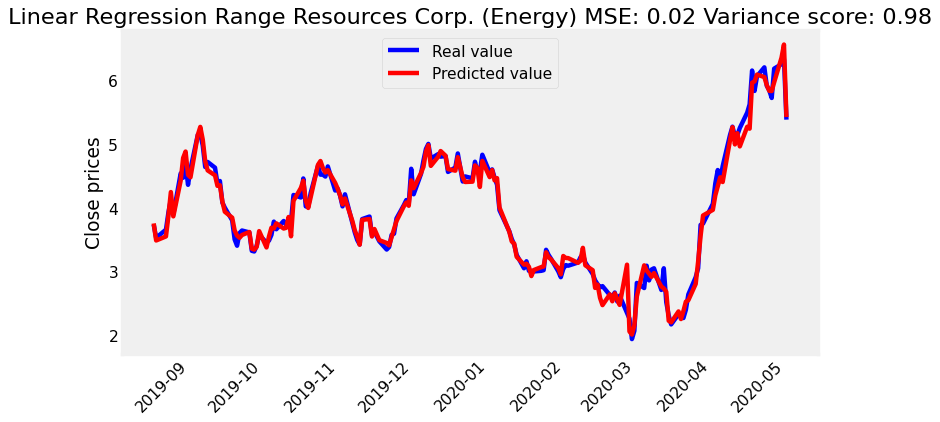

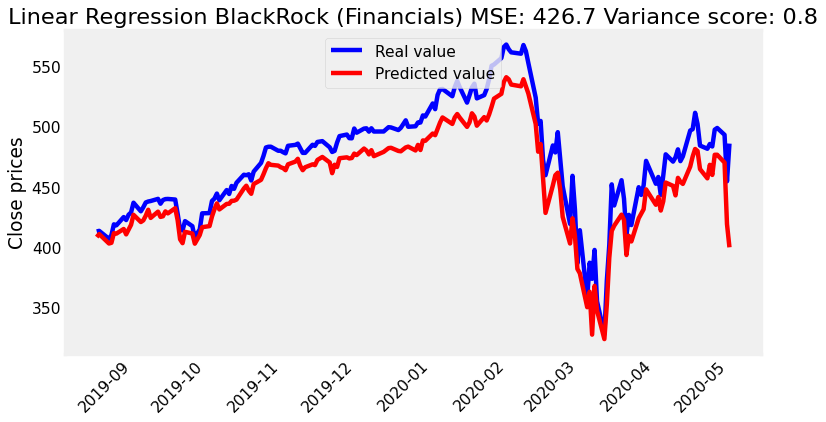

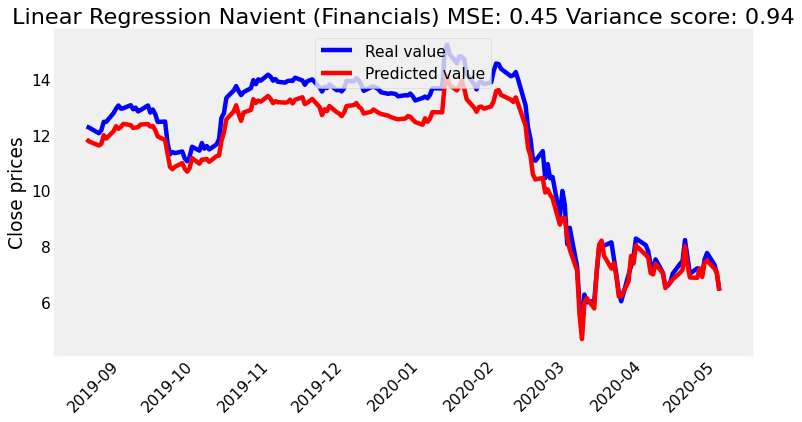

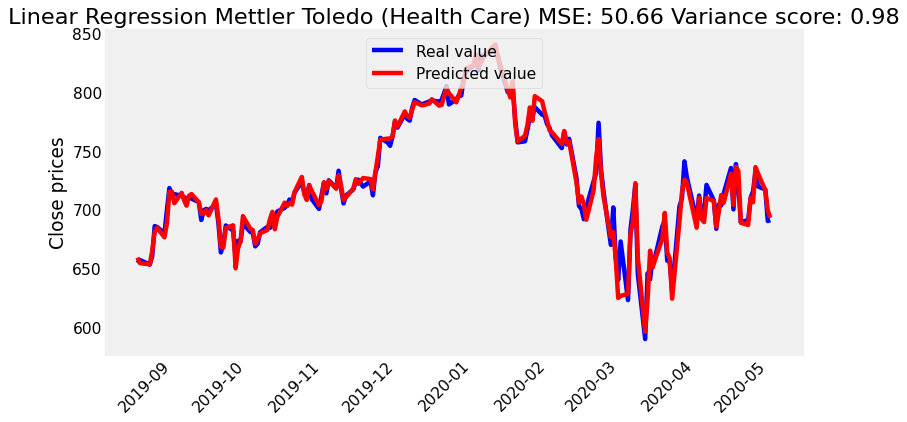

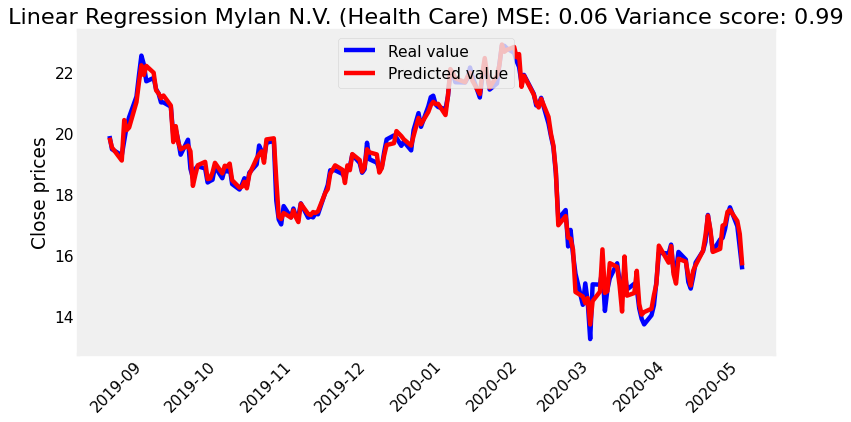

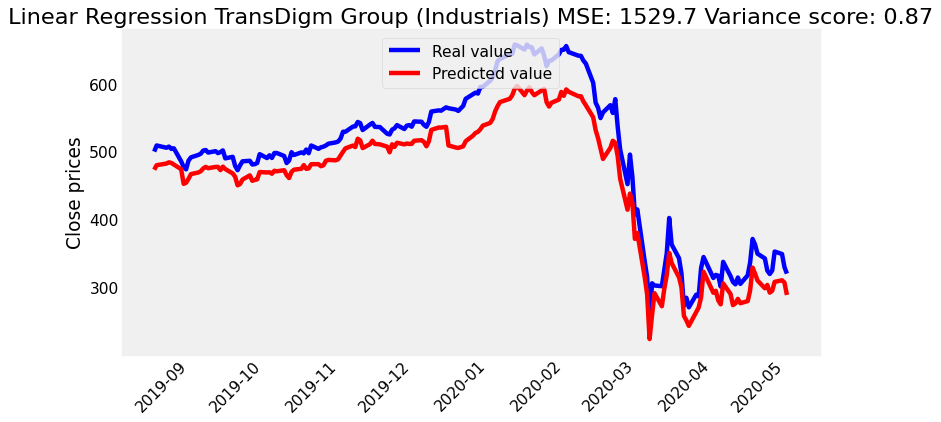

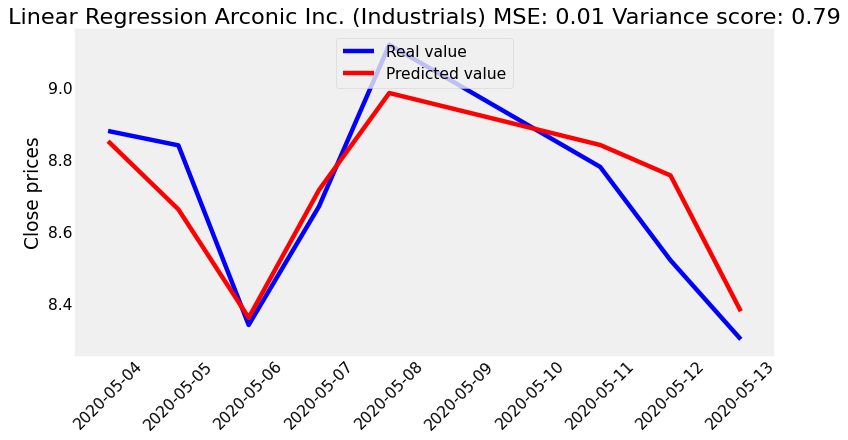

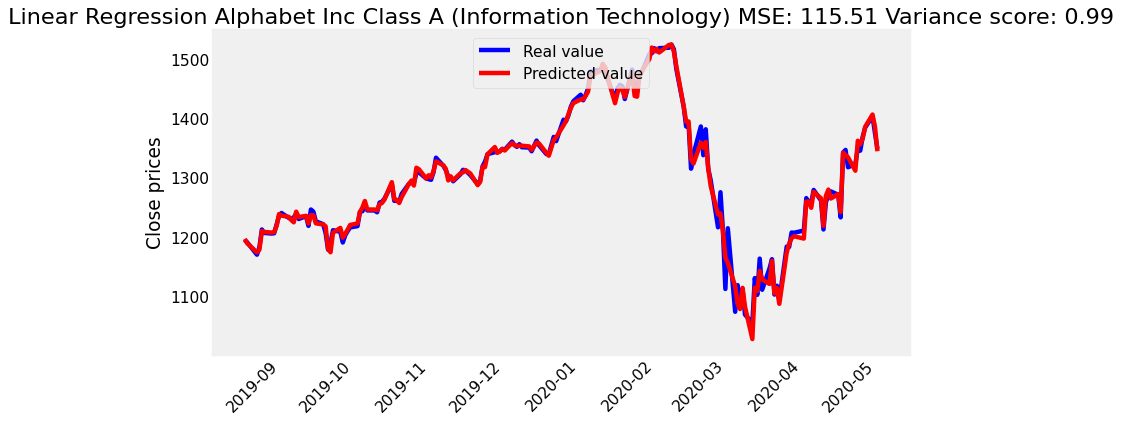

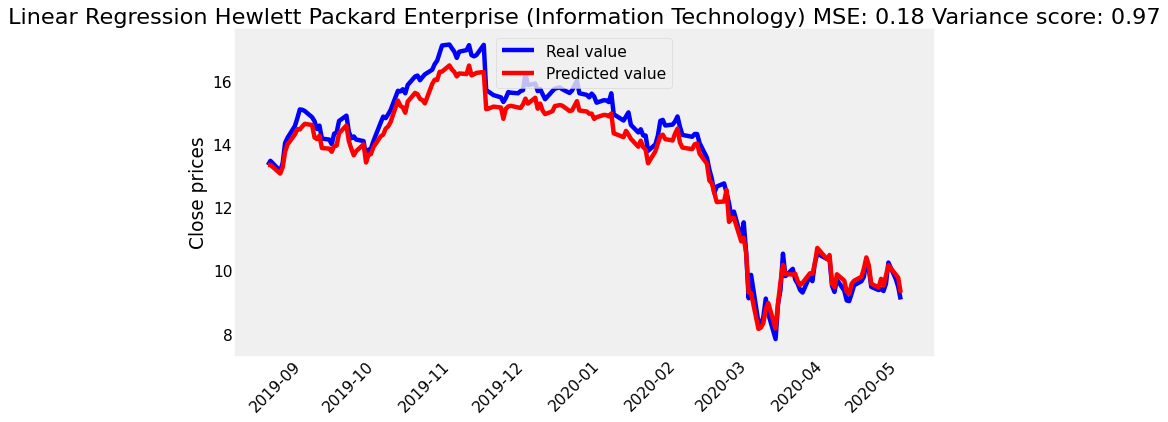

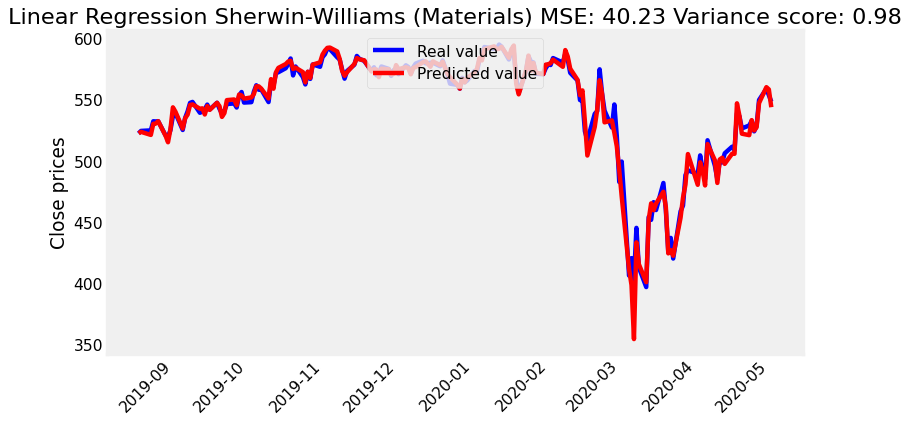

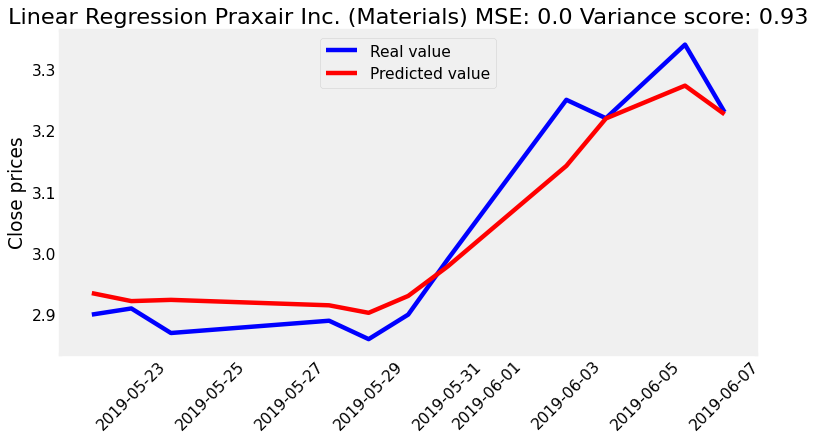

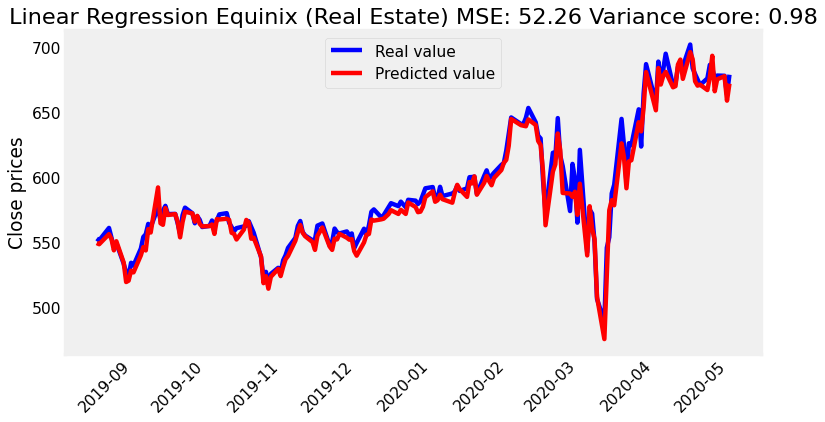

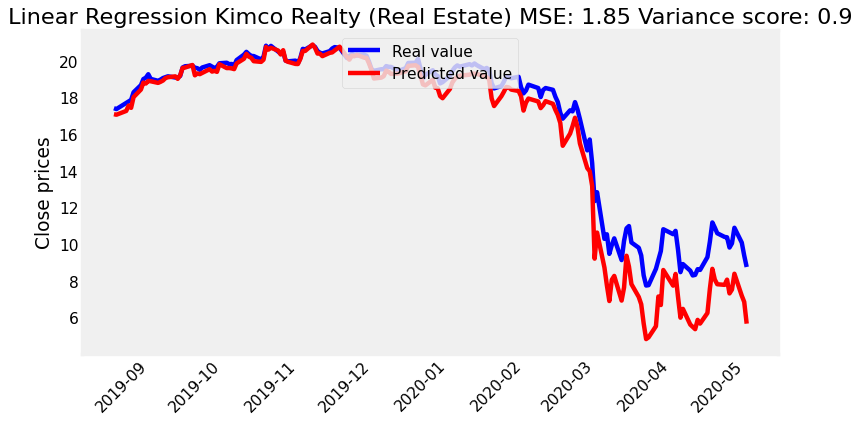

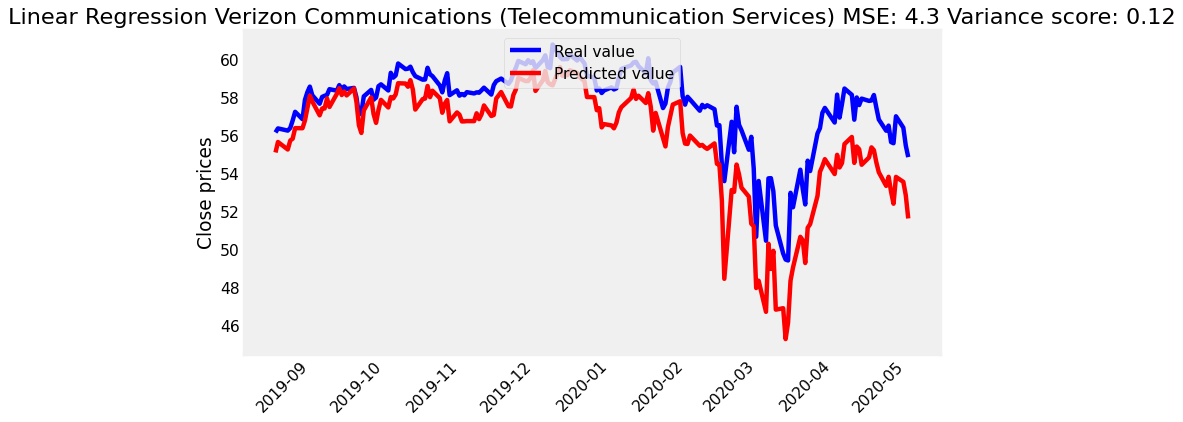

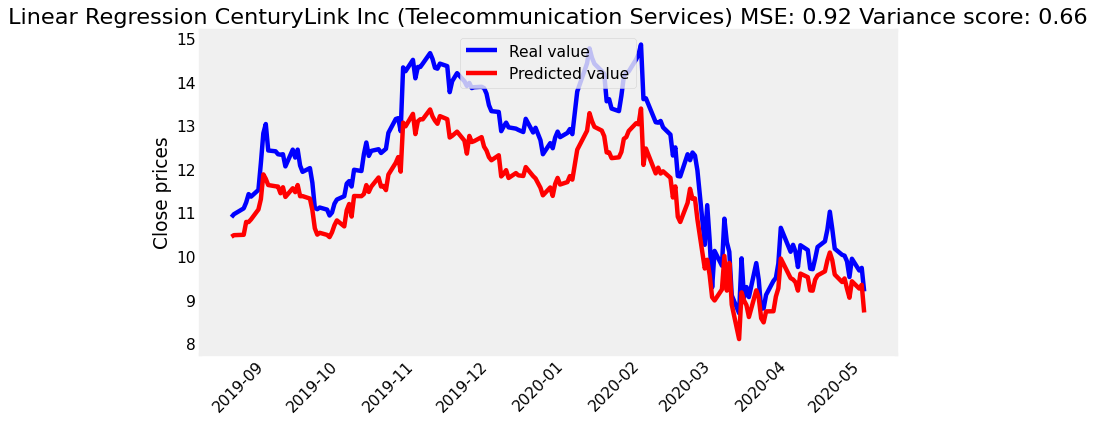

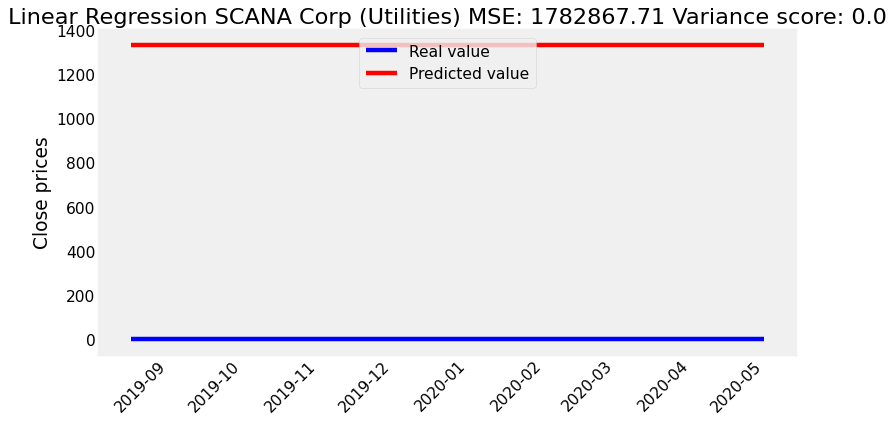

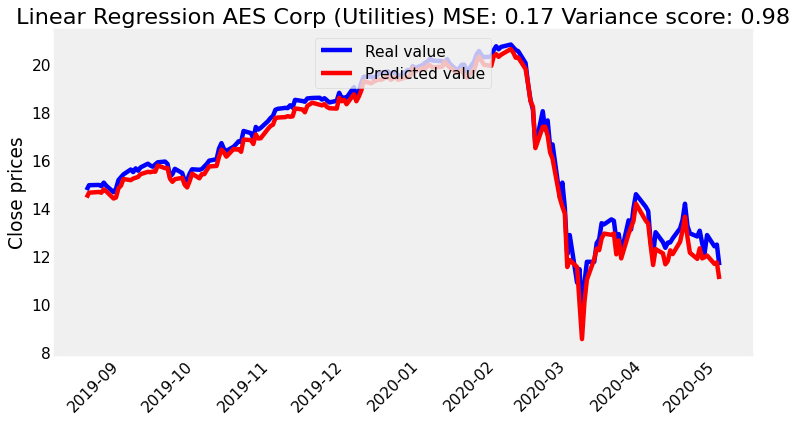

In [13]:
# Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.dates as mdates
import numpy as np
import yfinance as yf
import datetime
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.figure


# Data Prep
covid_data_final2 = []
covid_data_final2 = pd.DataFrame(covid_data_final2, columns = ['Date'])

covid_data_final2['Date'] = pd.date_range(start='1/1/2018', end=datetoday, freq='D').astype(str)

covid_data_final2 = pd.merge(covid_data_final2, covid_data_final, how='left', on=['Date'])

covid_data_final2 = covid_data_final2.drop(['Recovered_cases', 'Deaths', 'Week','new_cases_last_week'], axis=1)
covid_data_final2['Confirmed_cases'] = covid_data_final2['Confirmed_cases'].fillna(0)

# Downloading data for the shortlisted companies again
for i in range(final_company_list.shape[0]):

  data = yf.download(final_company_list['symbol'].iloc[i],'2018-01-01',datetoday)
  data = data.reset_index()

  data.insert(1, "Date_og", data['Date'], True)
  data['Date'] = data['Date'].astype(str)
  data = pd.merge(data, covid_data_final2, how = 'left', on='Date')
  
  # Predicting a stock using simple linear regression
  
  # Column names
  x = data[['High', 'Low', 'Open', 'Volume', 'Confirmed_cases']]
  
  y = data['Adj Close'].values
  date = data.loc[:, ['Date_og']]
  
  m, n = data.shape

  x = pd.DataFrame(x)
  y = pd.DataFrame(y)

  x_train = x.loc[:np.floor(m*0.7)]
  x_test = x.loc[np.floor(m*0.7)+1:]

  y_train = y.loc[:np.floor(m*0.7)]
  y_test = y.loc[np.floor(m*0.7)+1:]

  date_train = date.loc[:np.floor(m*0.7)]
  date_test = date.loc[np.floor(m*0.7)+1:]

  # Creating Linear regression object
  lr = LinearRegression()

  # Taining the model using training sets
  lr.fit(x_train, y_train)
  Coefficients = lr.coef_
  Intercept = lr.intercept_

  # Loading actual and predicted values for comparison
  predict = lr.predict(x_test)

  # Testing the accuracy
  # print('Root Mean Square Error:', math.sqrt(metrics.mean_squared_error(y_test, predict)))
  #nprint('Variance score: %.2f' % lr.score(x_test, y_test))

  # Plot outputs
  plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.plot_date(date_test, y_test, fmt='b-', xdate=True, ydate=False, label='Real value')
  plt.plot_date(date_test, lr.predict(x_test), fmt='r-', xdate=True, ydate=False, label='Predicted value')

  plt.xticks(rotation=45)
  plt.legend(loc='upper center')
  plt.ylabel('Close prices')
  plt.title('Linear Regression ' + final_company_list['company'].iloc[i] + ' (' + final_company_list['sector'].iloc[i] + ') MSE: ' + str(round(metrics.mean_squared_error(y_test, predict),2)) + ' Variance score: ' + str(round(lr.score(x_test, y_test),2)))
  plt.grid()
  plt.savefig(final_company_list['company'].iloc[i] + '_LR.png', bbox_inches='tight')

In [0]:
# path = '/content/LR_data'
# os.chdir(path)
!zip -r /content/LR_data/LR_Graphs.zip /content/LR_data/
# from google.colab import files

LSTM Implementation

In [0]:
# Output of this block was not executed because of computational limitations and time. Please run this block again if required.

#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Merging COVID-19 (Confirmed_cases) data into this data
covid_data_final2 = []
df = []
covid_data_final2 = pd.DataFrame(covid_data_final2, columns = ['Date'])

covid_data_final2['Date'] = pd.date_range(start='8/19/2004', end=datetoday, freq='D').astype(str)

covid_data_final2 = pd.merge(covid_data_final2, covid_data_final, how='left', on=['Date'])

covid_data_final2 = covid_data_final2.drop(['Recovered_cases', 'Deaths', 'Week','new_cases_last_week'], axis=1)
covid_data_final2['Confirmed_cases'] = covid_data_final2['Confirmed_cases'].fillna(0)

datetoday = datetime.datetime.today().strftime('%Y-%m-%d')
data = yf.download("MTD",'2004-08-19',datetoday)
data = data.reset_index()
data.columns
data.tail()

print(df)

data.insert(1, "Date_og", data['Date'], True)
data['Date'] = data['Date'].astype(str)

df = pd.merge(data, covid_data_final2, how = 'left', on='Date')

# Train Test split
data_training = df[df['Date_og']<'2019-01-01'].copy()
data_test = df[df['Date_og']>='2019-01-01'].copy()

data_training = data_training.drop(['Date', 'Date_og'], axis = 1)
data_test = data_test.drop(['Date', 'Date_og'], axis = 1)

train_data = data_training

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
train_data

X_train = []
Y_train = []

for i in range (60, train_data.shape[0]):
  X_train.append(train_data[i - 60:i])
  Y_train.append(train_data[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape, Y_train.shape

#### Building LSTM ####
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], data.shape[1] - 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.summary()

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, Y_train, epochs=50, batch_size=32)

past_data = data_training.tail(60)

df = past_data.append(data_test, ignore_index=True)
#df = df.drop(['Date_og'], axis=1)
df.head()

inputs = scaler.fit_transform(df)
inputs

X_test = []
Y_test = []

for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  Y_test.append(inputs[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

Y_pred = regressor.predict(X_test)

scaler.scale_

scale = 1/1.84202789e-03
scale

Y_pred = Y_pred * scale
Y_test = Y_test * scale
Y_test

#### Visualizing the Data ####
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Stock Price')
plt.plot(Y_pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('LSTM: Mettler Toledo (Industry - Healthcare)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

SVR Model

[*********************100%***********************]  1 of 1 completed


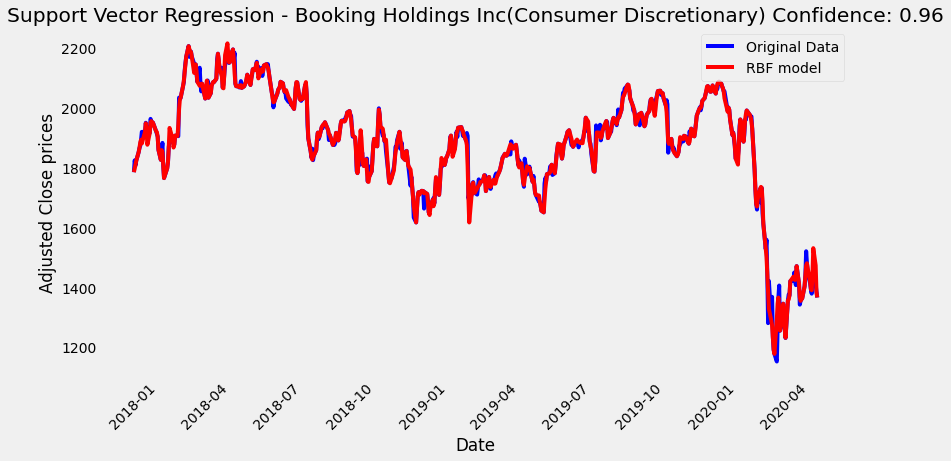

[*********************100%***********************]  1 of 1 completed


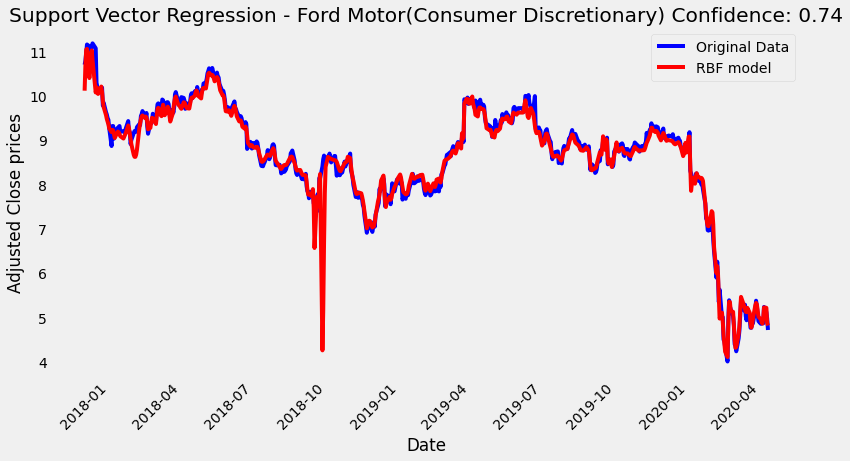

[*********************100%***********************]  1 of 1 completed


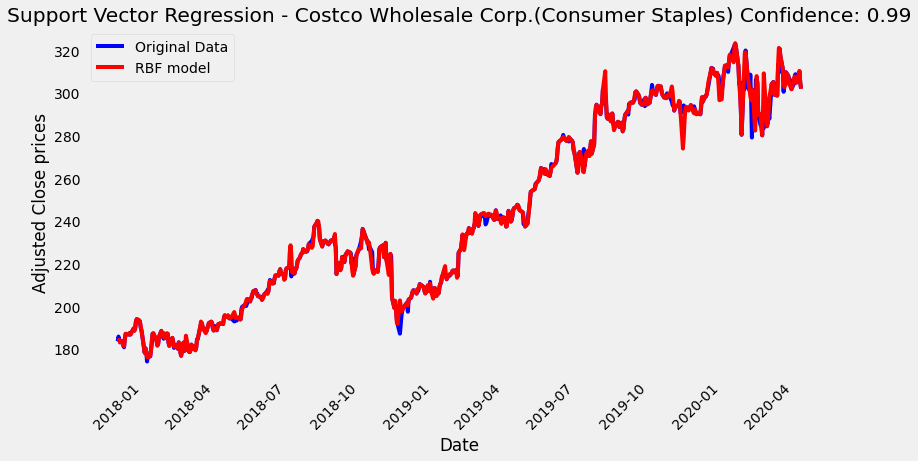

[*********************100%***********************]  1 of 1 completed


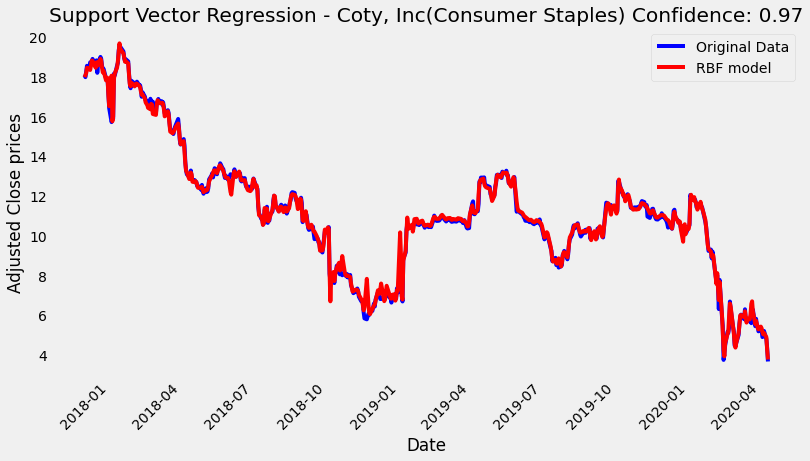

[*********************100%***********************]  1 of 1 completed


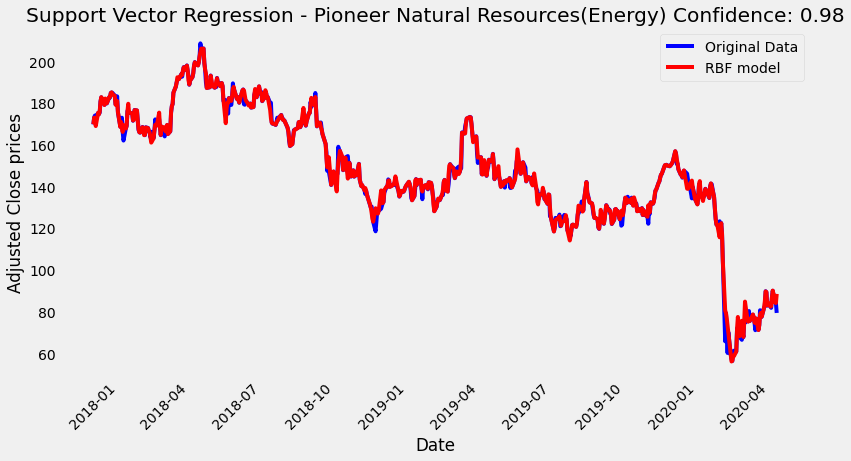

[*********************100%***********************]  1 of 1 completed


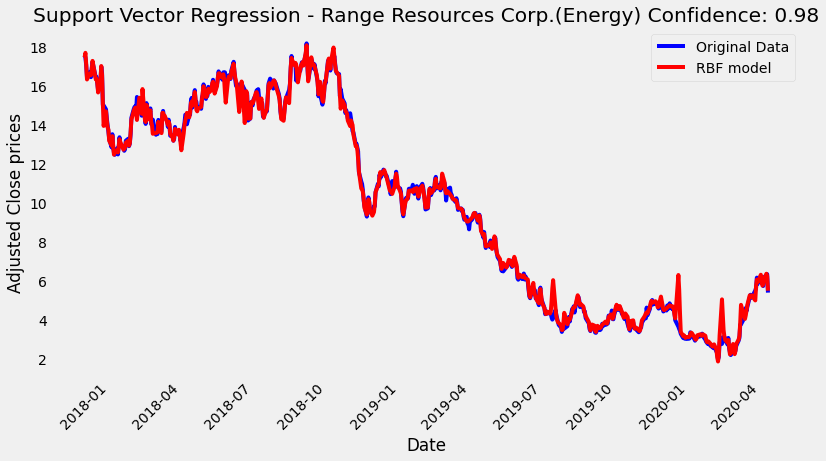

[*********************100%***********************]  1 of 1 completed


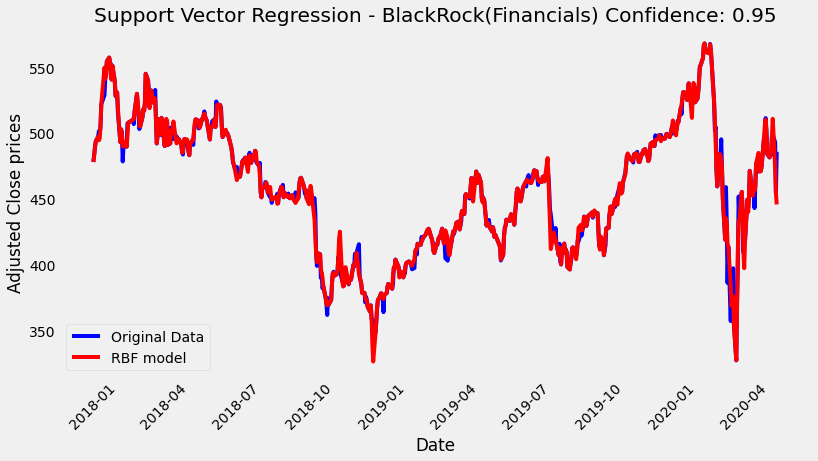

[*********************100%***********************]  1 of 1 completed


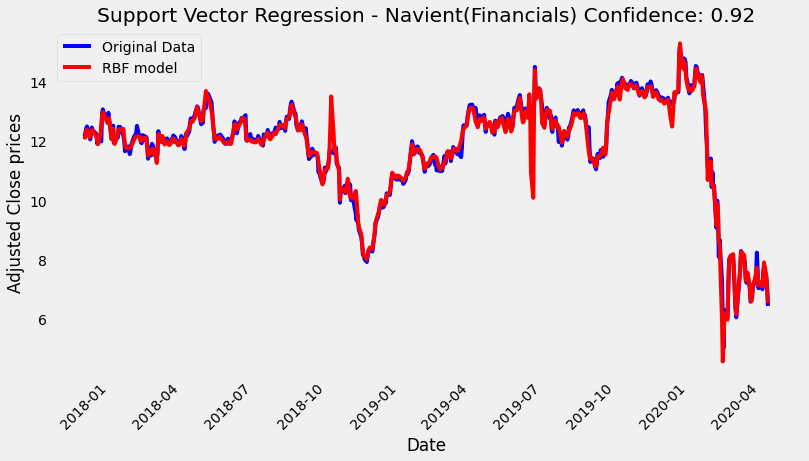

[*********************100%***********************]  1 of 1 completed


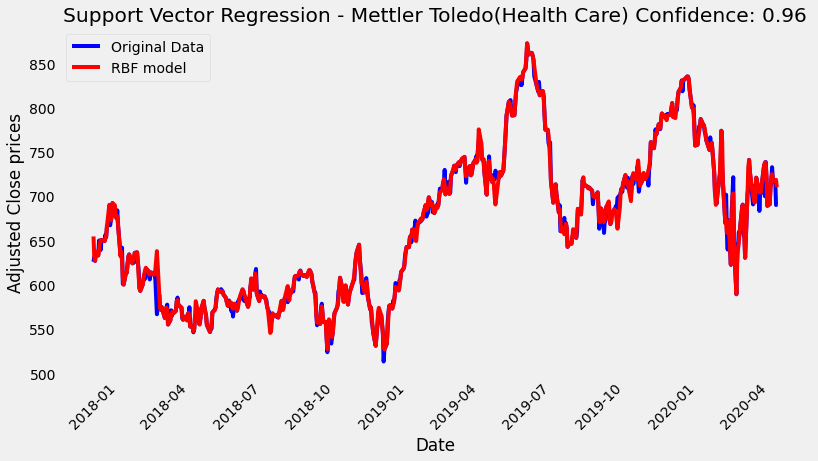

[*********************100%***********************]  1 of 1 completed


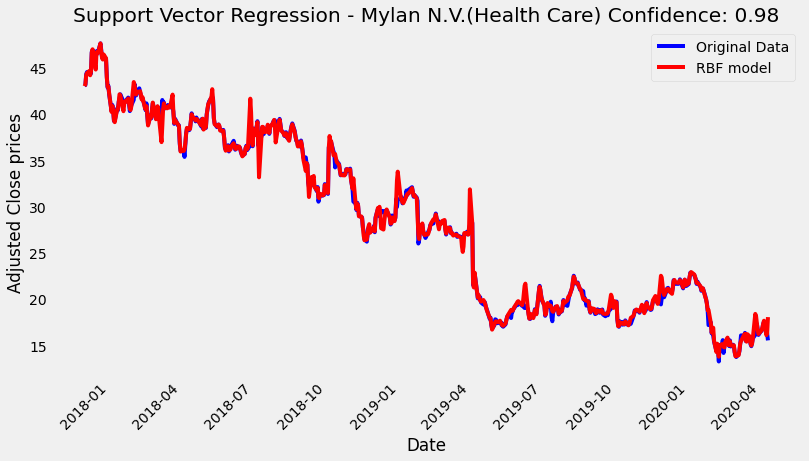

[*********************100%***********************]  1 of 1 completed


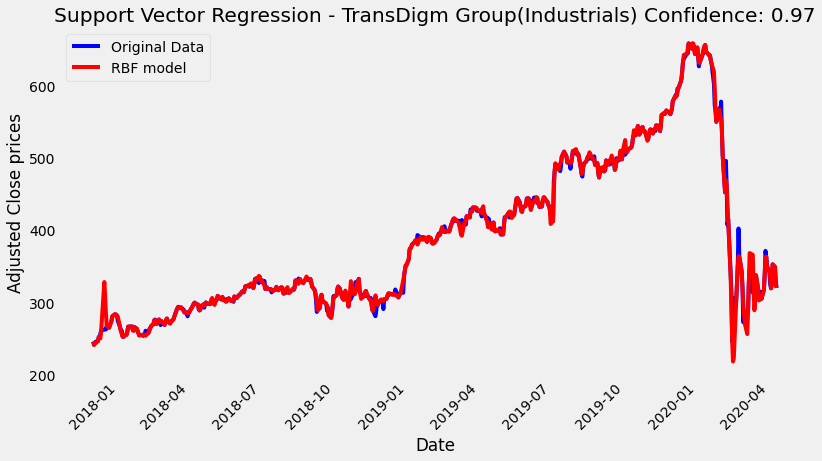

[*********************100%***********************]  1 of 1 completed


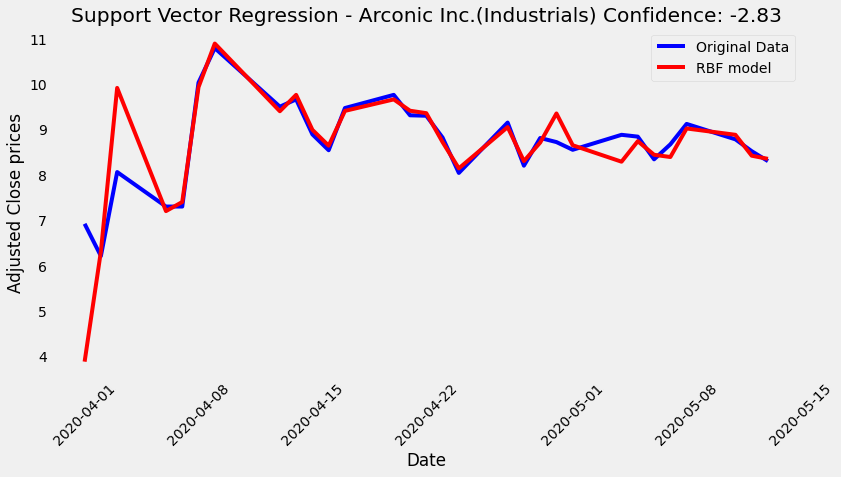

[*********************100%***********************]  1 of 1 completed


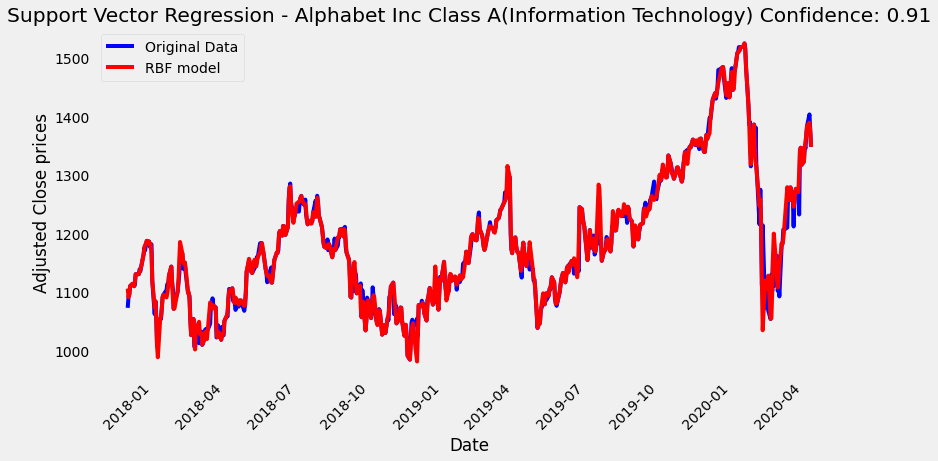

[*********************100%***********************]  1 of 1 completed


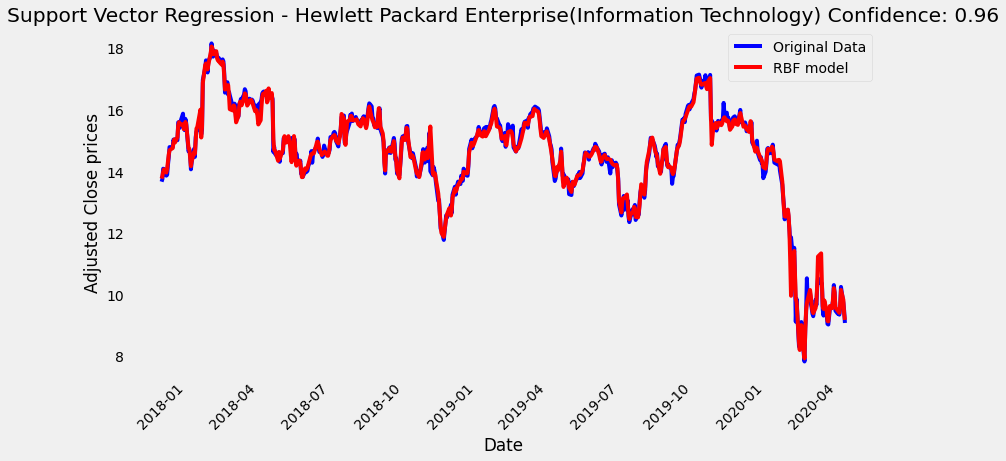

[*********************100%***********************]  1 of 1 completed


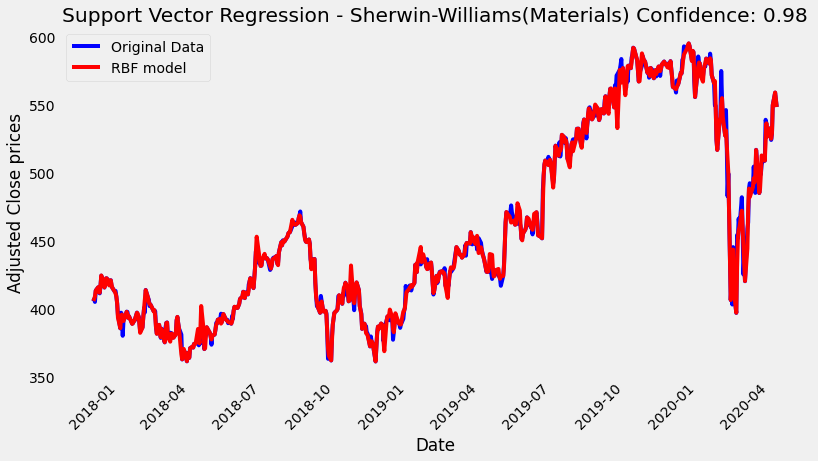

[*********************100%***********************]  1 of 1 completed


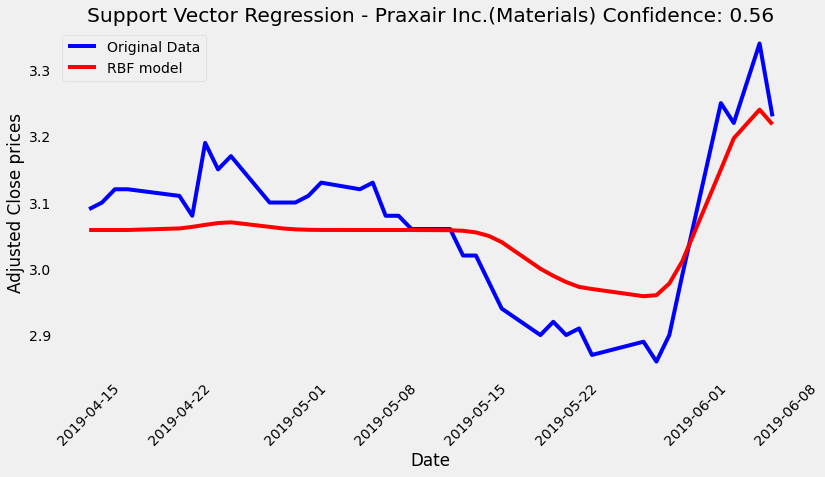

[*********************100%***********************]  1 of 1 completed


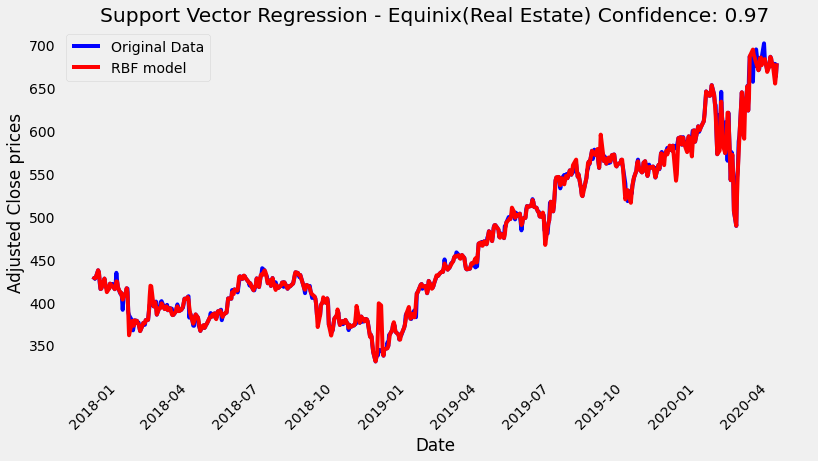

[*********************100%***********************]  1 of 1 completed


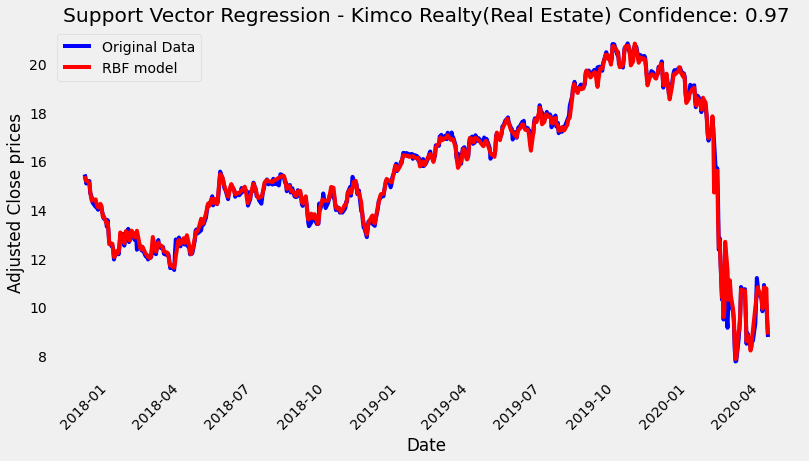

[*********************100%***********************]  1 of 1 completed


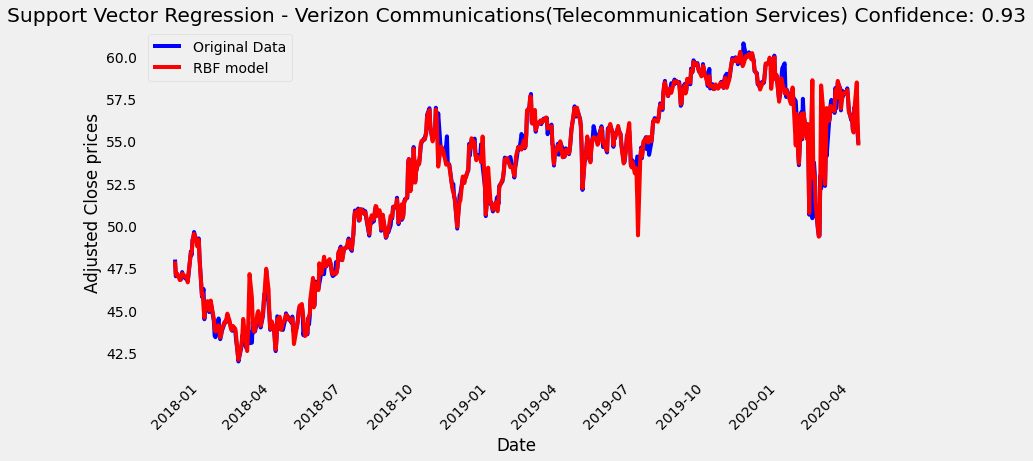

[*********************100%***********************]  1 of 1 completed


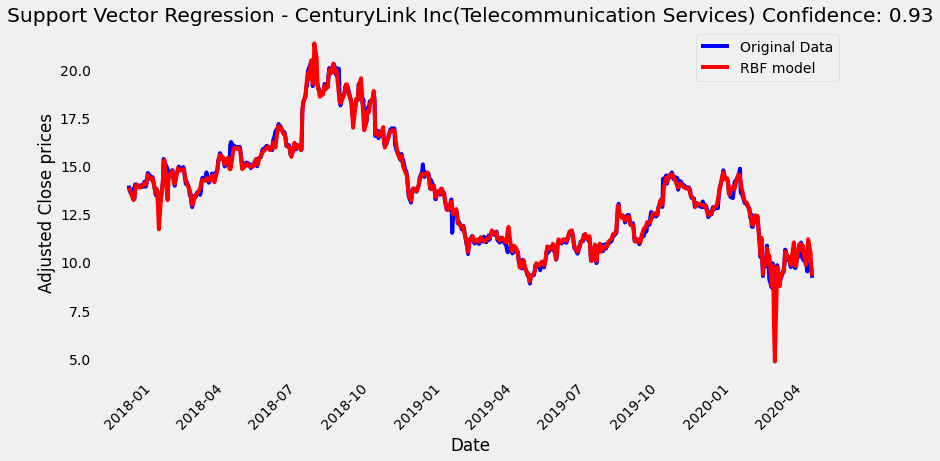

[*********************100%***********************]  1 of 1 completed


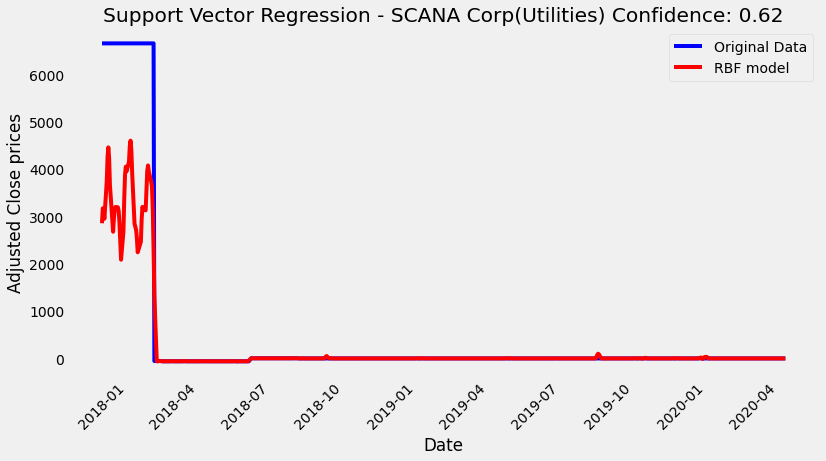

[*********************100%***********************]  1 of 1 completed


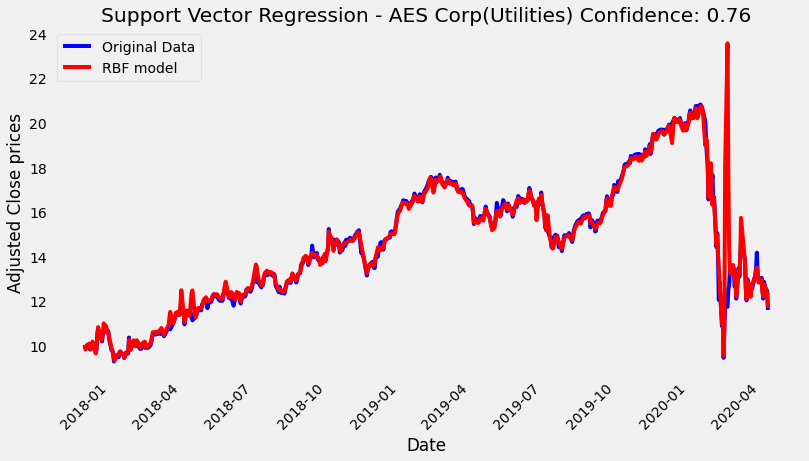

In [16]:
from sklearn.svm import SVR
import matplotlib.dates as mdates
import numpy as np
import yfinance as yf
import datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure
import warnings
warnings.filterwarnings('ignore')

# SVR

datetoday = datetime.datetime.today().strftime('%Y-%m-%d')

for i in range(final_company_list.shape[0]):
  data = yf.download(final_company_list['symbol'].iloc[i],'2018-01-01',datetoday)
  data = data.reset_index()
  m,n = data.shape

  date1 = data['Date']

  svr_data = data.loc[:,['Date']]
  z = svr_data['Date'].apply(lambda x: mdates.date2num(x))

  z = pd.DataFrame(z)
  y = data['Adj Close']

  z1 = z.to_numpy()
  prices = data['Adj Close'].to_numpy()

  #Convert to 1D Array
  z1 = np.reshape(z1,(len(z1),1))
  prices = np.reshape(prices,(len(prices),1))

  z1_train, z1_test, prices_train, prices_test = train_test_split(z1, prices, test_size=0.2)

  svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
  svr_rbf.fit(z1_train, prices_train)

  #Testing Model: Score returns the Co-efficient of Determination (R^2) of the prediction
  svm_confidence = svr_rbf.score(z1_test, prices_test)
  svr_predictions = svr_rbf.predict(z1)
  # rmse = math.sqrt(metrics.mean_squared_error(prices_test, svr_predictions))

  plt.figure(figsize = (12,6))
  plt.plot(z1, prices, color= 'Blue', label= 'Original Data')
  plt.plot(date1, svr_predictions, color= 'red', label= 'RBF model')

  plt.xticks(rotation=45)
  plt.legend(loc='upper center')
  plt.xlabel('Date')
  plt.ylabel('Adjusted Close prices')
  plt.title('Support Vector Regression - ' + final_company_list['company'].iloc[i] + '(' + final_company_list['sector'].iloc[i] + ') Confidence: ' + str(round(svm_confidence,2)))
  # ') RMSE: ' + rmse +
  plt.grid()
  plt.legend()
  plt.savefig(final_company_list['company'].iloc[i] + '_SVR.png', bbox_inches='tight')
  plt.show()

In [0]:
!zip -r /content/SVR_data/SVR_Graphs.zip /content/SVR_data/

updating: content/SVR_data/ (stored 0%)
updating: content/SVR_data/Hewlett Packard Enterprise_SVR.png (deflated 5%)
updating: content/SVR_data/CenturyLink Inc_SVR.png (deflated 5%)
updating: content/SVR_data/Sherwin-Williams_SVR.png (deflated 4%)
updating: content/SVR_data/Kimco Realty_SVR.png (deflated 5%)
updating: content/SVR_data/AES Corp_SVR.png (deflated 4%)
updating: content/SVR_data/Navient_SVR.png (deflated 4%)
updating: content/SVR_data/Range Resources Corp._SVR.png (deflated 5%)
updating: content/SVR_data/TransDigm Group_SVR.png (deflated 5%)
updating: content/SVR_data/Praxair Inc._SVR.png (deflated 5%)
updating: content/SVR_data/Verizon Communications_SVR.png (deflated 4%)
updating: content/SVR_data/Mettler Toledo_SVR.png (deflated 4%)
updating: content/SVR_data/Arconic Inc._SVR.png (deflated 6%)
updating: content/SVR_data/Pioneer Natural Resources_SVR.png (deflated 5%)
updating: content/SVR_data/BlackRock_SVR.png (deflated 4%)
updating: content/SVR_data/Coty, Inc_SVR.png (